### Suppose that I fit a logistic regression model using historical data collected from students
$$\ln\left(\frac{p}{1-p}\right) = -3 + 0.8 \times \text{Hours_Studied} + 1.5 \times \text{Review_Session}$$


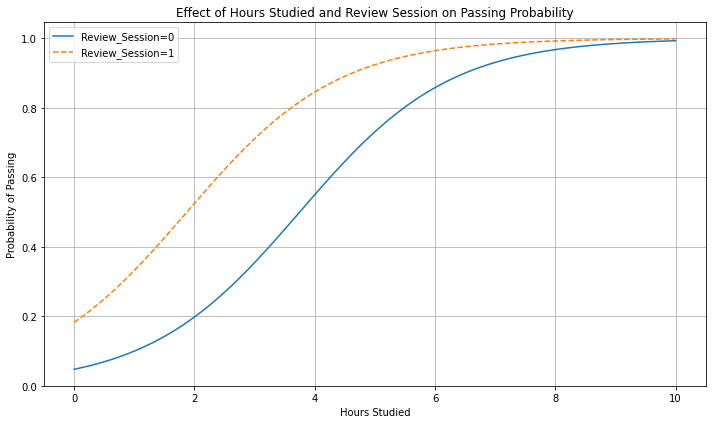

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic function
def logistic_function(z):
    return 1 / (1 + np.exp(-z))

# Define the model
def log_odds(hours_studied, review_session):
    return -3 + 0.8 * hours_studied + 1.5 * review_session

# Generate some data
hours_studied = np.linspace(0, 10, 100)

# Calculate log-odds and probabilities for both Review_Session=0 and Review_Session=1
log_odds_0 = log_odds(hours_studied, 0)
probability_0 = logistic_function(log_odds_0)

log_odds_1 = log_odds(hours_studied, 1)
probability_1 = logistic_function(log_odds_1)

# Plot the data
plt.figure(figsize=(10,6))

plt.plot(hours_studied, probability_0, label='Review_Session=0')
plt.plot(hours_studied, probability_1, label='Review_Session=1', linestyle='--')

plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Effect of Hours Studied and Review Session on Passing Probability')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


# Visualizing the data

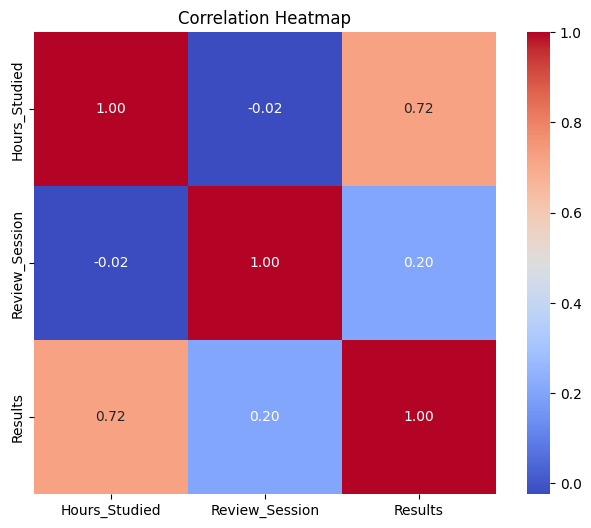

<ipython-input-16-c68a83126819>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Results', y='Hours_Studied', data=data, ci=None)


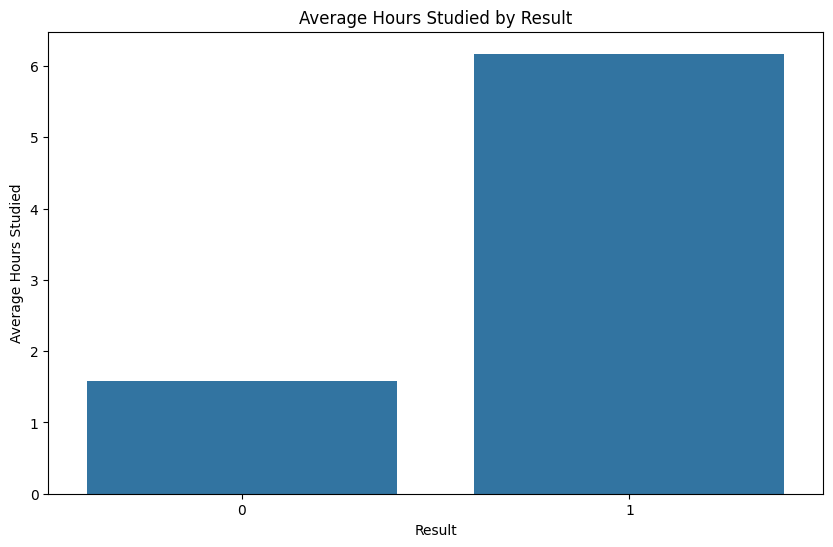

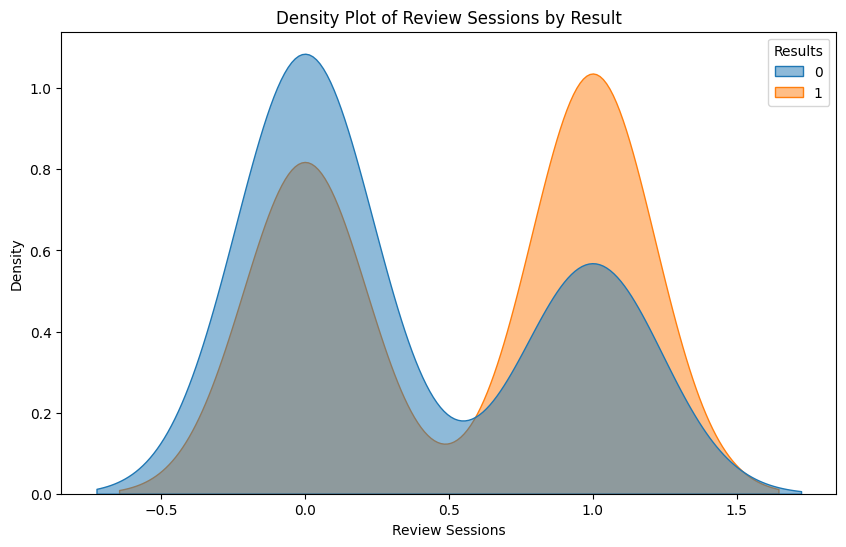

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('student_data.csv')

data['Result'] = data['Results'].astype('category').cat.codes

correlation = data[['Hours_Studied', 'Review_Session', 'Results']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Results', y='Hours_Studied', data=data, ci=None)
plt.title('Average Hours Studied by Result')
plt.xlabel('Result')
plt.ylabel('Average Hours Studied')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Review_Session', hue='Results', common_norm=False, fill=True, alpha=0.5)
plt.title('Density Plot of Review Sessions by Result')
plt.xlabel('Review Sessions')
plt.ylabel('Density')
plt.show()


# Calculating the performance-metrics: Accuracy, ROC and AUC

Model Coefficients:
                 Coefficient
Hours_Studied      1.365420
Review_Session     1.877976
Accuracy: 0.9300
AUC: 0.9761


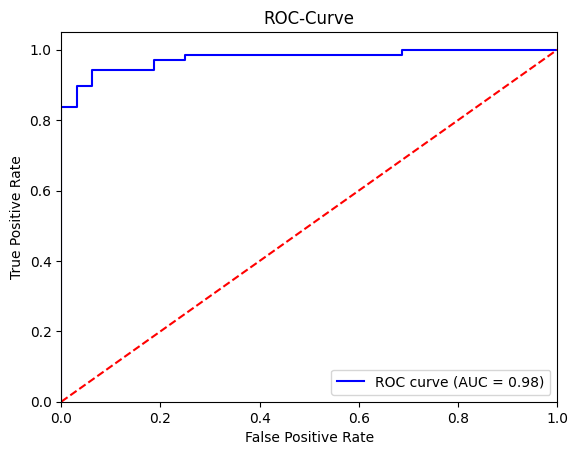

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

data = pd.read_csv('student_data.csv')

X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X, y)

coefficients = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coefficient'])
print("Model Coefficients:\n", coefficients)

y_pred = model.predict(X)
y_pred_proba = model.predict_proba(X)[:, 1]

accuracy = accuracy_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba)

print(f'Accuracy: {accuracy:.4f}')
print(f'AUC: {roc_auc:.4f}')

fpr, tpr, thresholds = roc_curve(y, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Curve')
plt.legend(loc="lower right")
plt.show()